In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

In [2]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

# Vertex Count

    Change!!
    In this script, I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 25 mT with a rate of 0.0125 mT/s (2000 s) and then mantaining the magnetic field constant (25 mT). Then, we are analyzing the output data of Script-8.1.
    


In [3]:
#rate = 25/2000

In [4]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-12.0"

In [5]:
Shakti = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp*.dat'):
        print(file)
        Shakti.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Shakti = []
for i in range(len(Shakti)):
    keys_Shakti.append(i)

ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp27.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp5.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp20.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp14.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp45.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp11.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp26.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp32.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp47.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp44.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp36.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp39.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp49.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp16.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp0.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp33.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp48.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp23.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp18

In [6]:
Shakti_exp = pd.concat(Shakti, keys = keys_Shakti)

In [7]:
Shakti_exp.index.names = ['Exp', 'frame', 'id']

In [8]:
Shakti_exp

x            y  coordination  charge   dx   dy
Exp frame id                                                            
0   0     0      -28.384776   -56.769553             3       1  1.0  0.0
          1     1107.006276  1021.851947             3       1 -1.0  0.0
          2     1050.236724  1050.236724             2       0 -1.0  1.0
          3      965.082395   709.619408             3      -1  0.0 -1.0
          4      823.158513  1021.851947             3       1 -1.0  2.0
...                     ...          ...           ...     ...  ...  ...
49  2500  1232  1107.006276   709.619408             2       0 -1.0  1.0
          1233   652.849855   -85.154329             2       0 -1.0 -1.0
          1234   -28.384776   936.697618             2       0  1.0 -1.0
          1235   -28.384776   823.158513             2       0  1.0 -1.0
          1236   -28.384776   766.388960             2       0  1.0  1.0

[30986850 rows x 6 columns]

### Filter the vertices at the boundaries 

In [9]:
First_frame = Shakti_exp.loc[0,0]

In [10]:
x_min = 100
y_min = 50

width = 900
hight = 900

#width = 300
#hight = 300

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

100 1000 50 950


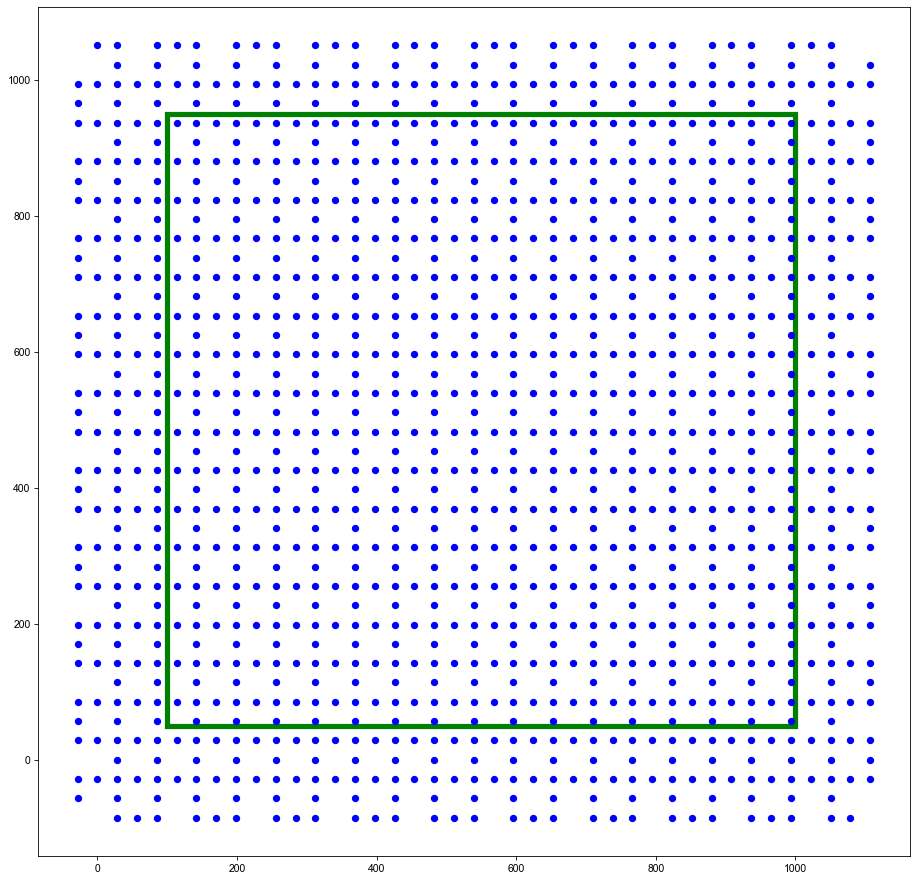

In [11]:
from matplotlib.patches import Rectangle
fig =plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

plt.plot(First_frame.x, First_frame.y , 'o')
ax.add_patch(Rectangle((x_min, y_min),width, hight,fc ='none', ec ='g',lw = 5))

In [12]:
Ca = Shakti_exp.loc[(Shakti_exp['x']<x_max) & (Shakti_exp['x']>x_min)]
Shakti_exp = Ca.loc[(Ca['y']<y_max) & (Ca['y']>y_min)]

In [13]:
Shakti_exp

x           y  coordination  charge   dx   dy
Exp frame id                                                          
0   0     3     965.082395  709.619408             3      -1  0.0 -1.0
          10    993.467171  113.539105             3       1  1.0 -2.0
          14    454.156421  482.541197             3      -1 -2.0 -1.0
          16    482.541197  482.541197             4       0 -2.0 -2.0
          17    510.925974  482.541197             3       1 -2.0 -1.0
...                    ...         ...           ...     ...  ...  ...
49  2500  1200  255.462987  312.232539             4      -2  0.0  2.0
          1201  539.310750  681.234631             3       1 -1.0  0.0
          1202  567.695526  709.619408             3       3  0.0  1.0
          1203  255.462987  340.617316             3       1  1.0  0.0
          1204  596.080303  738.004184             3       1  1.0  2.0

[19238400 rows x 6 columns]

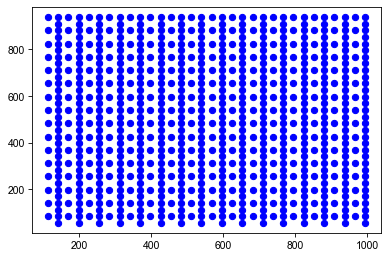

In [14]:
plt.plot(Shakti_exp.loc[0,0].x,Shakti_exp.loc[0,0].y,'o')

### Classify vertices

In [15]:
Shakti_exp["type"] = np.NaN

# 4-fold vertices classification

Shakti_exp.loc[Shakti_exp.charge==-4, "type"] = "Q = -4"
Shakti_exp.loc[Shakti_exp.charge==-2, "type"] = "Q = -2"
Shakti_exp.loc[Shakti_exp.charge==+2, "type"] = "Q = +2"
Shakti_exp.loc[Shakti_exp.charge==+4, "type"] = "Q = +4"

zeroq = Shakti_exp.charge==0

dipole_magnitude = np.sqrt(Shakti_exp[zeroq].dx**2+Shakti_exp[zeroq].dy**2)

Shakti_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Shakti_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Shakti_exp.loc[Shakti_exp.charge==+1, "type"] = "Q = +1"
Shakti_exp.loc[Shakti_exp.charge==-1, "type"] = "Q = -1"
Shakti_exp.loc[Shakti_exp.charge==+3, "type"] = "Q = +3"
Shakti_exp.loc[Shakti_exp.charge==-3, "type"] = "Q = -3"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
Shakti_exp =Shakti_exp.query('coordination == 4 or coordination == 3')

In [17]:
Shakti_exp

x           y  coordination  charge   dx   dy    type
Exp frame id                                                                  
0   0     3     965.082395  709.619408             3      -1  0.0 -1.0  Q = -1
          10    993.467171  113.539105             3       1  1.0 -2.0  Q = +1
          14    454.156421  482.541197             3      -1 -2.0 -1.0  Q = -1
          16    482.541197  482.541197             4       0 -2.0 -2.0   Q = 0
          17    510.925974  482.541197             3       1 -2.0 -1.0  Q = +1
...                    ...         ...           ...     ...  ...  ...     ...
49  2500  1200  255.462987  312.232539             4      -2  0.0  2.0  Q = -2
          1201  539.310750  681.234631             3       1 -1.0  0.0  Q = +1
          1202  567.695526  709.619408             3       3  0.0  1.0  Q = +3
          1203  255.462987  340.617316             3       1  1.0  0.0  Q = +1
          1204  596.080303  738.004184             3       1  1.0  2.0  Q = +1

[19238400 rows x 7 columns]

## Route 1: definitive

In [18]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    array_coordT = np.tile(array_coord,int(len(vrt_count)/len(array_coord)))# 9 types of charges and 10 experiments 
    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return vrt_count

In [19]:
count_m = count_vertices(Shakti_exp)

    the err of the fraction is missing...

In [20]:
v_counts_m = count_m.groupby(["frame","type","coordination"]).mean()
v_counts_m["err"] = count_m['fraction'].groupby(["frame","type","coordination"]).std()/np.sqrt(count_m['fraction'].groupby(["frame","type","coordination"]).count().values)

    I have to drop the rows without fraction of charge. 

In [21]:
v_counts_m

number  fraction       err
frame type   coordination                            
0     Q = +1 3             193.32  0.377578  0.002611
             4               0.00  0.000000  0.000000
      Q = +2 3               0.00  0.000000  0.000000
             4              63.16  0.246719  0.004026
      Q = +3 3              63.12  0.123281  0.002049
...                           ...       ...       ...
2500  Q = -3 4               0.00  0.000000  0.000000
      Q = -4 3               0.00  0.000000  0.000000
             4              79.66  0.311172  0.003955
      Q = 0  3               0.00  0.000000  0.000000
             4               2.18  0.008516  0.000818

[9018 rows x 3 columns]

    Dropping rows with zero values:

In [22]:
v_counts_m = v_counts_m.query('number != 0')

In [23]:
v_counts_m['time'] = v_counts_m.index.get_level_values('frame')

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


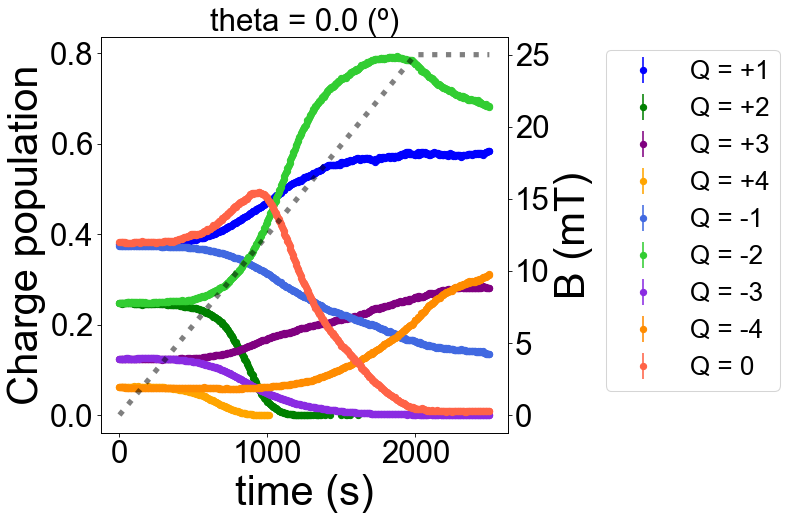

In [24]:
fig, ax1 = plt.subplots(figsize=(7,7))

ax2 = ax1.twinx()



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.7, 1))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)
ax1.set_title(f"theta = 0.0 (º)", size = 30)


ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

#v_counts_m.to_csv('FreeBound.dat', sep = "\t")

plt.show()

Now I will filter data to merge with the charge transfer plot

In [34]:
LFrame = v_counts_m.loc[2500]
LFrame['charge'] = LFrame.index.get_level_values('type')

def charge_value(row):
    
    value = int(row['charge'][-2:])
    return value

LFrame['charge'] = LFrame.apply (lambda row: charge_value(row) , axis=1)
LFrame['fraction*charge'] = LFrame['fraction']*LFrame['charge']
sum_df = LFrame.groupby(['coordination']).sum()
sum_df.to_csv('final-Charge_shakti.dat', sep = '\t')

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [25]:
v_counts_m3 = v_counts_m.query('coordination == 3')
v_counts_m4 = v_counts_m.query('coordination == 4')

In [26]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "navy", "tomato", 
                                                    "red", "plum", "blue", 
                                                    "navy", "tomato",
                                                    "red"]) 

Q = +1
Q = +3
Q = -1
Q = -3
Q = +2
Q = +4
Q = -2
Q = -4
Q = 0


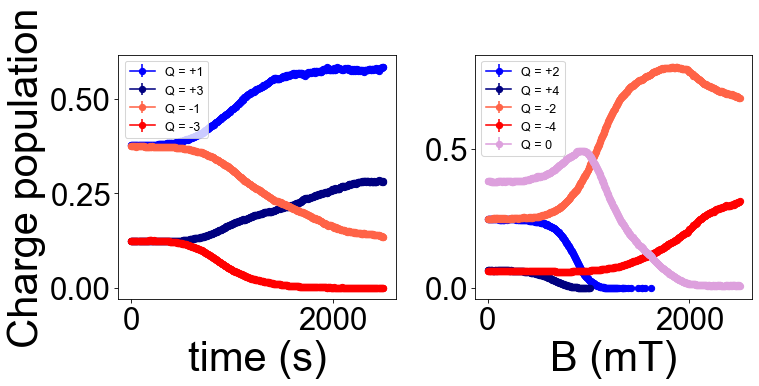

In [27]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))

for typ_m, mtype in v_counts_m3.groupby('type'):
    print(typ_m)
    
    ax[0].errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"],fmt = '-o', label = typ_m)

for typ_m, mtype in v_counts_m4.groupby('type'):
    print(typ_m)
    ax[1].errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='-o',label = typ_m)

ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=30)  

ax[0].legend(fontsize = 12)
ax[0].set_xlabel('time (s)', size = 40)
ax[0].set_ylabel('Charge population', size = 40)

ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=30)  

ax[1].legend(fontsize = 12)
ax[1].set_xlabel('B (mT)', size = 40)


plt.tight_layout()